In [25]:
from imports import *
import wrangle as wr
df = pd.read_csv('Hotel_Reviews.csv')
df = wr.wrangle_hotel(use_cache=True)
#df = wr.nlp_clean(df)


df.info()
df.head()

Using cached csv file...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 40 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   month_name                                  515738 non-null  object 
 1   month                                       515738 non-null  int64  
 2   year                                        515738 non-null  int64  
 3   day_name                                    515738 non-null  object 
 4   day                                         515738 non-null  int64  
 5   quarter                                     515738 non-null  int64  
 6   hotel_name                                  515738 non-null  object 
 7   street                                      515738 non-null  object 
 8   city                                        515738 non-null  object 
 9   zip_code                                    5

,month_name,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,country,lat,lng,additional_number_of_scoring,average_score,total_number_of_reviews,reviewer_nationality,trip_type,nights_stayed,group_type,total_number_of_reviews_reviewer_has_given,reviewer_score,nps_group,days_since_review,neg_sentiment_score,neg_lem_sentiment_score,review_total_negative_word_counts,negative_unique_word_count,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_stem,negative_lemma,positive_review,positive_clean_review,positive_stem,positive_lemma
0,August,8,2015,Tuesday,4,3,Hilton London Metropole,225 Edgware Road Westminster Borough,London,W2 1JU,United Kingdom,51.519569,-0.170521,1485,7.5,6977,United Kingdom,leisure,2.0,group,4,7.5,passive,730,-0.1027,-0.1027,54,39,0.4019,8,6,0.4019,First day the swimming pool was not opened th...,first day swimmig pool ot opeed therefore coul...,first day swimmig pool ot ope therefor could o...,first day swimmig pool ot opeed therefore coul...,The hotel was clean and accessible,hotel clean accessible,hotel clean access,hotel clean accessible
1,August,8,2015,Tuesday,4,3,Hotel Mademoiselle,7 Rue des Petits H tels 10th,Paris,arr 75010,France,48.877249,2.354304,125,8.6,853,United Kingdom,leisure,2.0,group,10,8.3,passive,730,0.0000,0.0000,0,2,0.7906,7,6,0.7906,No Negative,egative,eg,egative,very good location breakfast was great,good location breakfast great,good locat breakfast great,good location breakfast great
2,August,8,2015,Tuesday,4,3,Vienna Marriott Hotel,Parkring 12a 01 Innere Stadt,Vienna,1010,Austria,48.205097,16.377093,130,8.2,939,Qatar,unknown,3.0,family with young children,4,10.0,promoter,730,0.0000,0.0000,2,1,0.7579,7,6,0.7579,Nothing,NaN,NaN,NaN,It was very nice excellent hotel,nice excellent hotel,nice excel hotel,nice excellent hotel
3,August,8,2015,Tuesday,4,3,Novotel Amsterdam City,Europaboulevard 10 Zuideramstel,Amsterdam,1083 AD,Netherlands,52.333803,4.888471,341,7.8,2501,Austria,leisure,2.0,group,34,9.6,promoter,730,0.0000,0.0000,0,2,0.9414,27,23,0.9414,No Negative,egative,eg,egative,Slightly out of the city center but very easy...,slightly city center easy get tram train reall...,slightli citi center easi get tram train reall...,slightly city center easy get tram train reall...
4,August,8,2015,Tuesday,4,3,Hilton London Kensington Hotel,Holland Park Avenue Kensington and Chelsea,London,W11 4UL,United Kingdom,51.505108,-0.213266,843,7.8,3801,Qatar,leisure,1.0,solo traveler,5,7.5,passive,730,0.0000,0.0000,0,2,0.7964,6,5,0.7964,No Negative,egative,eg,egative,Great easy to reAch location,great easy reach location,great easi reach locat,great easy reach location


In [27]:
print(f'Number of rows where regular positive sentiment score is not equal to its lemmatized counterpart: {len(df[(df.pos_sentiment_score != df.pos_lem_sentiment_score)])}')
print(f'Number of rows where regular negative sentiment score is not equal to its lemmatized counterpart: {len(df[(df.neg_sentiment_score != df.neg_lem_sentiment_score)])}')

Number of rows where regular positive sentiment score is not equal to its lemmatized counterpart: 15238
Number of rows where regular negative sentiment score is not equal to its lemmatized counterpart: 6790


In [3]:
ineq_pos_df = df[(df.pos_sentiment_score != df.pos_lem_sentiment_score)]
ineq_neg_df = df[(df.neg_sentiment_score != df.neg_lem_sentiment_score)]



In [28]:
barza_df = df.copy()[df.city == 'Barcelona']
barza_df

,month_name,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,country,lat,lng,additional_number_of_scoring,average_score,total_number_of_reviews,reviewer_nationality,trip_type,nights_stayed,group_type,total_number_of_reviews_reviewer_has_given,reviewer_score,nps_group,days_since_review,neg_sentiment_score,neg_lem_sentiment_score,review_total_negative_word_counts,negative_unique_word_count,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_stem,negative_lemma,positive_review,positive_clean_review,positive_stem,positive_lemma
20,August,8,2015,Tuesday,4,3,Gran Hotel Torre Catalunya,Avenida Roma 2 4 Sants Montju c,Barcelona,08014,Spain,41.379557,2.142546,215,8.5,1671,Canada,leisure,1.0,family with young children,1,10.0,promoter,730,-0.5267,-0.5267,54,44,0.6249,8,6,0.6249,I clearly requested before I booked online I ...,clearly requested booked olie required 1 room ...,clearli request book oli requir 1 room 2 adult...,clearly requested booked olie required 1 room ...,Large rooms and bathrooms Great brunch,large rooms bathrooms great brunch,larg room bathroom great brunch,large room bathroom great brunch
23,August,8,2015,Tuesday,4,3,Hotel Margot House,Paseo de Gracia 46 Eixample,Barcelona,08007,Spain,41.391880,2.166036,42,9.4,335,United Kingdom,leisure,4.0,couple,2,10.0,promoter,730,-0.0516,-0.0516,5,3,0.8779,20,17,0.8779,Having to leave,havig leave,havig leav,havig leave,Perfect location The staff were impeccable Th...,perfect location staff impeccable hotel like i...,perfect locat staff impecc hotel like inner ci...,perfect location staff impeccable hotel like i...
57,August,8,2015,Tuesday,4,3,Sansi Pedralbes,Avenida Pearson 1 3 Les Corts,Barcelona,08034,Spain,41.393670,2.111542,23,8.4,274,Ireland,business,3.0,couple,1,8.8,passive,730,-0.1027,-0.1027,11,10,0.4939,5,4,0.4939,Hard to control temp in room too cold for sle...,hard cotrol temp room cold sleepig,hard cotrol temp room cold sleepig,hard cotrol temp room cold sleepig,Friendly and enthuasiatic staff,friendly enthuasiatic staff,friendli enthuasiat staff,friendly enthuasiatic staff
152,August,8,2015,Tuesday,4,3,Condes de Barcelona,Paseo de Gracia 73 Eixample,Barcelona,08008,Spain,41.393550,2.162710,163,8.7,1319,Saudi Arabia,leisure,2.0,couple,1,6.3,detractor,730,0.8271,0.8271,84,60,0.0000,4,3,0.0000,The fridge was closed and we asked them to op...,fridge closed ad asked ope put water said ca o...,fridg close ad ask ope put water said ca oli b...,fridge closed ad asked ope put water said ca o...,Staff location style,staff location style,staff locat style,staff location style
162,August,8,2015,Tuesday,4,3,Exe Laietana Palace,Via Laietana 17 Ciutat Vella,Barcelona,08003,Spain,41.383354,2.179404,177,7.9,2045,Sweden,leisure,5.0,couple,11,8.5,passive,730,0.0000,0.0000,31,27,0.8910,15,13,0.8910,Small crack in the toilet seat that gave smal...,small crack toilet seat gave small piches ad t...,small crack toilet seat gave small pich ad tel...,small crack toilet seat gave small piches ad t...,Location was great Friendly staff and one gla...,location great friendly staff one glas free ca...,locat great friendli staff one gla free cava a...,location great friendly staff one glas free ca...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515719,August,8,2017,Thursday,3,3,Hotel The Serras,Passeig de Colom 9 Ciutat Vella,Barcelona,08002,Spain,41.380181,2.180688,102,9.6,604,United Arab Emirates,leisure,3.0,family with young children,17,10.0,promoter,0,0.0000,0.0000,2,1,-0.8173,53,38,-0.8173,Nothing,NaN,NaN,NaN,The smell as you walk in the hotel The sound ...,smell walk hotel sound isolation room hear not...,smell walk hotel sound isol room hear noth unb...,smell walk hotel sound isolation room hear not...
515724,August,8,2017,Thursday,3,3,Hotel Balmoral,Via Augusta

In [29]:
milan_df = df.copy()[df.city == 'Milan']
milan_df

,month_name,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,country,lat,lng,additional_number_of_scoring,average_score,total_number_of_reviews,reviewer_nationality,trip_type,nights_stayed,group_type,total_number_of_reviews_reviewer_has_given,reviewer_score,nps_group,days_since_review,neg_sentiment_score,neg_lem_sentiment_score,review_total_negative_word_counts,negative_unique_word_count,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_stem,negative_lemma,positive_review,positive_clean_review,positive_stem,positive_lemma
16,August,8,2015,Tuesday,4,3,The Yard Milano,Piazza XXIV Maggio 8 Milan City,Milan,Center 20123,Italy,45.453152,9.179172,103,9.2,786,Jordan,leisure,4.0,couple,39,10.0,promoter,730,0.0000,0.0000,0,2,0.6249,7,6,0.6249,No Negative,egative,eg,egative,Great style indeed a boutique hotel,great style indeed boutique hotel,great style inde boutiqu hotel,great style indeed boutique hotel
46,August,8,2015,Tuesday,4,3,Ch teau Monfort Relais Ch teaux,Corso Concordia 1 Milan City,Milan,Center 20129,Italy,45.468236,9.207380,159,9.0,1053,Kuwait,leisure,1.0,couple,8,9.6,promoter,730,0.0000,0.0000,2,1,0.0000,2,1,0.0000,Location,locatio,locatio,locatio,Service,service,servic,service
47,August,8,2015,Tuesday,4,3,Ch teau Monfort Relais Ch teaux,Corso Concordia 1 Milan City,Milan,Center 20129,Italy,45.468236,9.207380,159,9.0,1053,Saudi Arabia,leisure,1.0,couple,2,8.3,passive,730,0.2960,0.2960,23,22,0.4215,4,3,0.4215,Bedsheets were stained with yellowish wet liq...,bedsheets staied yellowish wet liquid said cle...,bedsheet stai yellowish wet liquid said cleaig...,bedsheets staied yellowish wet liquid said cle...,Nice luxury hotel,nice luxury hotel,nice luxuri hotel,nice luxury hotel
55,August,8,2015,Tuesday,4,3,Hotel Michelangelo,Piazza Luigi di Savoia 6 Central,Milan,Station 20124,Italy,45.484514,9.205753,347,8.4,3510,United Kingdom,leisure,4.0,solo traveler,3,10.0,promoter,730,0.0000,0.0000,0,2,0.8720,11,9,0.8720,No Negative,egative,eg,egative,Great location well run hotel with excellent ...,great location well run hotel excellent housek...,great locat well run hotel excel housekeep sta...,great location well run hotel excellent housek...
70,August,8,2015,Tuesday,4,3,Hotel Berna,Via Napo Torriani 18 Central,Milan,Station 20124,Italy,45.482669,9.203437,384,9.2,4017,Denmark,leisure,3.0,couple,1,8.3,passive,730,0.0000,0.0000,11,8,0.9136,27,23,0.9136,The hotel is relatively expensive for what it...,hotel relatively expesive,hotel rel expes,hotel relatively expesive,Very warm welcome by the staff great service ...,warm welcome staff great service perfect locat...,warm welcom staff great servic perfect locat c...,warm welcome staff great service perfect locat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515690,August,8,2017,Thursday,3,3,Nu Hotel,Via Feltre 19 B Citt,Milan,Studi 20132,Italy,45.491183,9.239361,64,8.9,1032,Ukraine,leisure,2.0,couple,4,8.8,passive,0,0.0000,0.0000,13,11,0.7269,24,20,0.7269,The room was very small and the bathroom need...,room small ad bathroom eeds reovatio,room small ad bathroom eed reovatio,room small ad bathroom eeds reovatio,Breakfast was very good especially sushi roll...,breakfast good especially sushi rolls design p...,breakfast good especi sushi roll design public...,breakfast good especially sushi roll design pu...
515699,August,8,2017,Thursday,3,3,Hotel Clerici,Via Clerici 11 Milan City,Milan,Center 20121,Italy,45.466772,9.187100,48,9.0,517,Norway,leisure,1.0,couple,2,7.1,passive,0,0.5106,0.5106,64,41,0.9022,24,21,0.9022,AC was not on when we arrived in the room We ...,ac ot whe arrived room show room staff opportu...,ac ot whe arriv room show room staff opportu t...,ac ot whe arrived room show room staff opportu...,Breakfast and location very good Friendly sta.

In [9]:
len(df[(df.negative_review == 'No Negative') | (df.negative_review == 'Nothing')])

127890

In [6]:
import prep
import nltk.sentiment

#df['clean_pos_review'] = df.positive_review.apply(prep.basic_clean)
#df['clean_neg_review'] = df.negative_review.apply(prep.basic_clean)

In [18]:
#df.clean_pos_review = df.clean_pos_review.apply(prep.remove_stopwords)
#df.clean_pos_review = df.clean_pos_review.apply(prep.remove_stopwords)

#df.head()

,hotel_address,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,month,year,day_name,day,quarter,negative_unique_word_count,positive_unique_word_count,location,clean_pos_review,clean_neg_review
review_date,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-08-04,225 Edgware Road Westminster Borough London W2...,1485,7.5,Hilton London Metropole,United Kingdom,First day the swimming pool was not opened th...,54,6977,The hotel was clean and accessible,8,4,7.5,"[leisure trip, group, superior queen room, sta...",730,51.519569,-0.170521,August,2015,Tuesday,4,3,39,6,United Kingdom,hotel clean accessible,first day the swimming pool was not opened th...
2015-08-04,7 Rue des Petits H tels 10th arr 75010 Paris F...,125,8.6,Hotel Mademoiselle,United Kingdom,No Negative,0,853,very good location breakfast was great,7,10,8.3,"[leisure trip, group, junior suite, stayed 2 n...",730,48.877249,2.354304,August,2015,Tuesday,4,3,2,6,Paris France,good location breakfast great,no negative
2015-08-04,Parkring 12a 01 Innere Stadt 1010 Vienna Austria,130,8.2,Vienna Marriott Hotel,Qatar,Nothing,2,939,It was very nice excellent hotel,7,4,10.0,"[family with young children, executive double ...",730,48.205097,16.377093,August,2015,Tuesday,4,3,1,6,Vienna Austria,nice excellent hotel,nothing
2015-08-04,Europaboulevard 10 Zuideramstel 1083 AD Amster...,341,7.8,Novotel Amsterdam City,Austria,No Negative,0,2501,Slightly out of the city center but very easy...,27,34,9.6,"[leisure trip, group, standard room with queen...",730,52.333803,4.888471,August,2015,Tuesday,4,3,2,23,Amsterdam Netherlands,slightly city center easy get tram train reall...,no negative
2015-08-04,Holland Park Avenue Kensington and Chelsea Lon...,843,7.8,Hilton London Kensington Hotel,Qatar,No Negative,0,3801,Great easy to reAch location,6,5,7.5,"[leisure trip, solo traveler, double hilton gu...",730,51.505108,-0.213266,August,2015,Tuesday,4,3,2,5,United Kingdom,great easy reach location,no negative


In [21]:
sia = nltk.sentiment.SentimentIntensityAnalyzer()
type(sia)
df['pos_sentiment_score'] = df.clean_pos_review.apply(lambda msg: sia.polarity_scores(msg)['compound'])
df['neg_sentiment_score'] = df.clean_neg_review.apply(lambda msg: sia.polarity_scores(msg)['compound'])

In [8]:
df.head()

,month_name,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,country,lat,lng,additional_number_of_scoring,average_score,total_number_of_reviews,reviewer_nationality,trip_type,nights_stayed,group_type,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,neg_sentiment_score,neg_lem_sentiment_score,review_total_negative_word_counts,negative_unique_word_count,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_stem,negative_lemma,positive_review,positive_clean_review,positive_stem,positive_lemma
0,August,8,2015,Tuesday,4,3,Hilton London Metropole,225 Edgware Road Westminster Borough,London,W2 1JU,United Kingdom,51.519569,-0.170521,1485,7.5,6977,United Kingdom,leisure,2.0,group,4,7.5,730,-0.1027,-0.1027,54,39,0.4019,8,6,0.4019,First day the swimming pool was not opened th...,first day swimming pool opened therefore could...,first day swim pool open therefor could access...,first day swimming pool opened therefore could...,The hotel was clean and accessible,hotel clean accessible,hotel clean access,hotel clean accessible
1,August,8,2015,Tuesday,4,3,Hotel Mademoiselle,7 Rue des Petits H tels 10th,Paris,arr 75010,France,48.877249,2.354304,125,8.6,853,United Kingdom,leisure,2.0,group,10,8.3,730,0.0000,0.0000,0,2,0.7906,7,6,0.7906,NaN,NaN,NaN,NaN,very good location breakfast was great,good location breakfast great,good locat breakfast great,good location breakfast great
2,August,8,2015,Tuesday,4,3,Vienna Marriott Hotel,Parkring 12a 01 Innere Stadt,Vienna,1010,Austria,48.205097,16.377093,130,8.2,939,Qatar,unknown,3.0,family with young children,4,10.0,730,0.0000,0.0000,2,1,0.7579,7,6,0.7579,Nothing,nothing,noth,nothing,It was very nice excellent hotel,nice excellent hotel,nice excel hotel,nice excellent hotel
3,August,8,2015,Tuesday,4,3,Novotel Amsterdam City,Europaboulevard 10 Zuideramstel,Amsterdam,1083 AD,Netherlands,52.333803,4.888471,341,7.8,2501,Austria,leisure,2.0,group,34,9.6,730,0.0000,0.0000,0,2,0.9414,27,23,0.9414,NaN,NaN,NaN,NaN,Slightly out of the city center but very easy...,slightly city center easy get tram train reall...,slightli citi center easi get tram train reall...,slightly city center easy get tram train reall...
4,August,8,2015,Tuesday,4,3,Hilton London Kensington Hotel,Holland Park Avenue Kensington and Chelsea,London,W11 4UL,United Kingdom,51.505108,-0.213266,843,7.8,3801,Qatar,leisure,1.0,solo traveler,5,7.5,730,0.0000,0.0000,0,2,0.7964,6,5,0.7964,NaN,NaN,NaN,NaN,Great easy to reAch location,great easy reach location,great easi reach locat,great easy reach location


In [9]:
len(df.street.value_counts())

1492

In [12]:
df.groupby('street').pos_sentiment_score.agg(['min', 'mean', 'median', 'max'])

,min,mean,median,max
street,,,,
1 15 Templeton Place Earl s Court Kensington and Chelsea,-0.4215,0.628214,0.7579,0.9883
1 2 Serjeant s Inn Fleet Street City of London,-0.4767,0.681689,0.8020,0.9951
1 3 Queens Garden Westminster Borough,-0.7906,0.509246,0.6249,0.9953
1 3 Rue d Argentine 16th,-0.2023,0.597106,0.7351,0.9945
1 5 Passage Ruelle 18th,-0.6486,0.364332,0.4215,0.9349
...,...,...,...,...
Wildpretmarkt 5 01 Innere Stadt,-0.4019,0.647758,0.7906,0.9876
Wilton Place Knightsbridge Westminster Borough,0.0000,0.528119,0.6369,0.9853
Wrights Lane Kensington and Chelsea,-0.8860,0.469916,0.5719,0.9970


In [13]:
df.groupby('street').neg_sentiment_score.agg(['min', 'mean', 'median', 'max'])

,min,mean,median,max
street,,,,
1 15 Templeton Place Earl s Court Kensington and Chelsea,-0.8957,0.062801,0.0000,0.9337
1 2 Serjeant s Inn Fleet Street City of London,-0.9501,0.044377,0.0000,0.9386
1 3 Queens Garden Westminster Borough,-0.9538,0.026610,0.0000,0.9741
1 3 Rue d Argentine 16th,-0.4767,0.079109,0.0000,0.7906
1 5 Passage Ruelle 18th,-0.8969,-0.241737,-0.4019,0.9657
...,...,...,...,...
Wildpretmarkt 5 01 Innere Stadt,-0.8957,0.039642,0.0000,0.9517
Wilton Place Knightsbridge Westminster Borough,-0.5994,0.072386,0.0000,0.9178
Wrights Lane Kensington and Chelsea,-0.9797,0.009179,0.0000,0.9854


In [3]:
df.columns

Index(['month', 'year', 'day_name', 'day', 'quarter', 'hotel_name', 'street',
       'city', 'zip_code', 'country', 'lat', 'lng',
       'additional_number_of_scoring', 'average_score',
       'total_number_of_reviews', 'reviewer_nationality', 'trip_type',
       'nights_stayed', 'group_type',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'days_since_review', 'neg_sentiment_score', 'neg_lem_sentiment_score',
       'review_total_negative_word_counts', 'negative_unique_word_count',
       'pos_sentiment_score', 'review_total_positive_word_counts',
       'positive_unique_word_count', 'pos_lem_sentiment_score',
       'negative_review', 'negative_clean_review', 'negative_stem',
       'negative_lemma', 'positive_review', 'positive_clean_review',
       'positive_stem', 'positive_lemma'],
      dtype='object')

In [29]:
df[df.reviewer_nationality == ' '].head(21)

,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,country,lat,lng,additional_number_of_scoring,average_score,total_number_of_reviews,reviewer_nationality,trip_type,nights_stayed,group_type,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,neg_sentiment_score,neg_lem_sentiment_score,review_total_negative_word_counts,negative_unique_word_count,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_stem,negative_lemma,positive_review,positive_clean_review,positive_stem,positive_lemma
8608,August,2015,Sunday,16,3,Hotel Am Konzerthaus Vienna MGallery by Sofitel,Am Heumarkt 35 37 03 Landstra e,Vienna,1030,Austria,48.199613,16.377355,125,8.6,1307,,leisure,4.0,family with young children,6,9.2,718,0.0000,0.0000,7,6,0.0000,9,8,0.0000,The old carpet in the room,old carpet room,old carpet room,old carpet room,They have everything you need in your stay,everything need stay,everyth need stay,everything need stay
11983,August,2015,Thursday,20,3,Strand Palace Hotel,372 Strand Westminster Borough,London,WC2R 0JJ,United Kingdom,51.511099,-0.120867,2288,8.1,9568,,leisure,2.0,solo traveler,5,8.8,714,0.0000,0.0000,0,2,0.7717,6,5,0.7717,NaN,NaN,NaN,NaN,BEST LOCATION IN ABSOLUTE COMFORT,best location absolute comfort,best locat absolut comfort,best location absolute comfort
13474,August,2015,Sunday,23,3,Millennium Hotel London Knightsbridge,17 25 Sloane Street Knightsbridge Kensington a...,London,SW1X 9NU,United Kingdom,51.499968,-0.159993,759,7.5,2746,,business,2.0,couple,8,6.7,711,0.0000,0.0000,9,8,0.4404,5,4,0.4404,The room very small there s no place,room small place,room small place,room small place,Location is very good,location good,locat good,location good
14506,August,2015,Monday,24,3,Brunelleschi Hotel,Via Baracchini 12 Milan City,Milan,Center 20123,Italy,45.461177,9.191047,311,8.3,3720,,leisure,2.0,family with older children,2,8.8,710,0.0000,0.0000,4,3,0.6249,10,9,0.6249,Bit dated decour,bit dated decour,bit date decour,bit dated decour,Great location just a walk to the main square,great location walk main square,great locat walk main squar,great location walk main square
30132,September,2015,Thursday,17,3,Hotel Louvre Montana,12 rue Saint Roch 1st,Paris,arr 75001,France,48.864463,2.331847,37,8.4,325,,leisure,3.0,family with young children,1,8.8,686,0.0000,0.0000,0,2,0.8927,19,15,0.8927,NaN,NaN,NaN,NaN,The hotel was in a great location in central P...,hotel great location central paris staff extre...,hotel great locat central pari staff extrem he...,hotel great location central paris staff extre...
34822,September,2015,Thursday,24,3,Expo Hotel Barcelona,Mallorca 1 23 Sants Montju c,Barcelona,08014,Spain,41.379205,2.142799,390,7.6,4646,,leisure,3.0,solo traveler,11,10.0,679,0.0000,0.0000,8,6,0.0000,14,12,0.0000,Rooms need flat screen tv s,rooms need flat screen tv,room need flat screen tv,room need flat screen tv,Allowed early check in to my room at 11 30am P...,allowed early check room 11 30am pool area,allow earli check room 11 30am pool area,allowed early check room 11 30am pool area
48915,October,2015,Friday,16,4,Corendon Vitality Hotel Amsterdam,Aletta Jacobslaan 7 Slotervaart,Amsterdam,1066 BP,Netherlands,52.346645,4.831098,555,8.4,4410,,leisure,5.0,group,12,8.3,657,-0.4588,-0.4588,32,28,0.8074,21,19,0.8074,No late checkout option was available had to ...,late checkout option available pay full night ...,late checkout option avail pay full night figh...,late checkout option available pay full night ...,Value of money New Friendly staff Clean Locati...,value money new friendly staff clean location ...,valu money new friendli staff clean locat cent...,value money new friendly staff clean location ...
52986,October,2015,Friday,23,4,Petit Palace Barcelona,Roger De Lluria 21 Esq Gran Via 662 Eixample,Barcelona,08037,Spain,41.390982,2.171494,90,7.9,1148,,business,3.0,solo traveler,2,7.9,650,0.1779,0.1779

In [3]:
import shap
from wordcloud import WordCloud

In [30]:
pos_corpus = wr.basic_clean(' '.join(df[df.positive_review.notna()].positive_review.str.strip()))
pos_corpus = wr.remove_stopwords(pos_corpus)
pos_corpus = wr.lemmatize(pos_corpus)


neg_corpus = wr.basic_clean(' '.join(df[df.negative_review.notna()].negative_review.str.strip()))
neg_corpus = wr.remove_stopwords(neg_corpus)
neg_corpus = wr.lemmatize(neg_corpus)


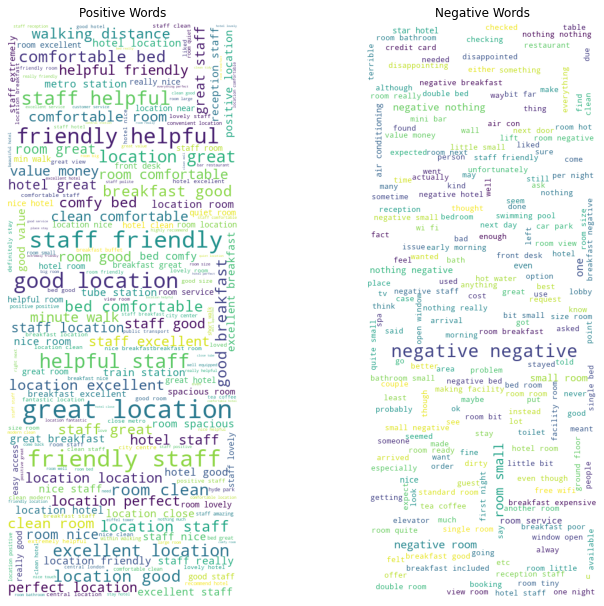

In [35]:
pos_cloud = WordCloud(background_color='white', height=1000, width=400).generate_from_text(pos_corpus)
neg_cloud = WordCloud(background_color='white', height=1000, width=400).generate_from_text(neg_corpus)

plt.figure(figsize=(10,8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, 0, .5, 1])]

axs[0].imshow(pos_cloud)
axs[1].imshow(neg_cloud)

axs[0].set_title('Positive Words')
axs[1].set_title('Negative Words')

for ax in axs: ax.axis('off')

In [36]:
pos_corpus_s = pd.Series(pos_corpus.split())
pos_wd_counts = pos_corpus_s.value_counts()
neg_corpus_s = pd.Series(neg_corpus.split())
neg_wd_counts = neg_corpus_s.value_counts()

pos_wd_counts

staff              196634
location           193607
room               181116
hotel              130109
good               112387
                    ...  
terrifically            1
playgroup               1
marchese                1
masseroni               1
confidentiality         1
Length: 47664, dtype: int64

In [37]:
neg_wd_counts

room            210828
negative        129780
hotel            80413
breakfast        59224
small            49885
                 ...  
veza                 1
slaba                1
surplus              1
diappointing         1
cloor                1
Length: 51345, dtype: int64

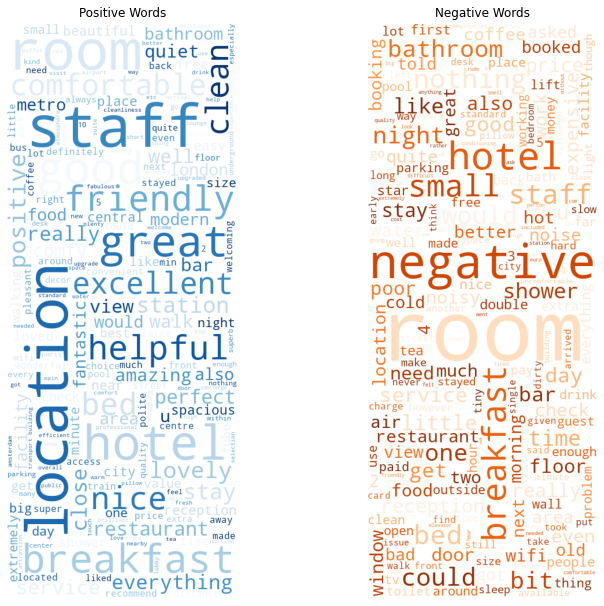

In [50]:
pos_freq_cloud = WordCloud(background_color='white', height=1000, width=400, colormap= 'Blues').generate_from_frequencies(pos_wd_counts)
neg_freq_cloud = WordCloud(background_color='white', height=1000, width=400, colormap= 'Oranges').generate_from_frequencies(neg_wd_counts)

plt.figure(figsize=(10,8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, 0, .5, 1])]

axs[0].imshow(pos_freq_cloud)
axs[1].imshow(neg_freq_cloud)

axs[0].set_title('Positive Words')
axs[1].set_title('Negative Words')

for ax in axs: ax.axis('off')

In [40]:
from PIL import Image
europe_mask = np.array(Image.open('europe_map.jpeg'))

